# Histogram : Gruplandırılmış bir verinin sütun grafiği ile gösterimidir

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fotoğraflarımı okuyorum

In [2]:
dark_horse=cv2.imread("input/horse.jpg")
# şimdi de bgr dan rgb çevirelim
show_horse=cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB)

rainbow=cv2.imread("input/rainbow.jpg")
# şimdi de bgr dan rgb çevirelim
show_rainbow=cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

red_bricks=cv2.imread("input/duvar.jpg")
# şimdi de bgr dan rgb çevirelim
show_bricks=cv2.cvtColor(red_bricks,cv2.COLOR_BGR2RGB)

Ekrana basalım ve görelim

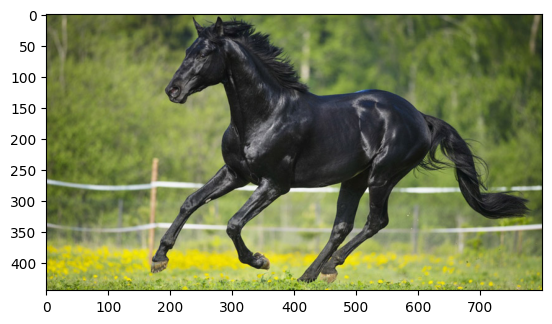

In [8]:
plt.imshow(show_horse)

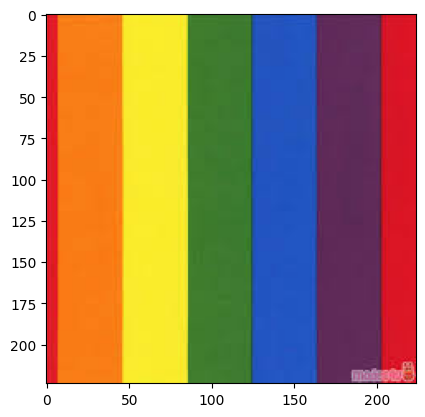

In [9]:
plt.imshow(show_rainbow)


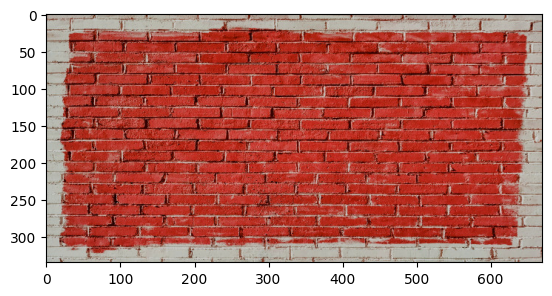

In [10]:
plt.imshow(show_bricks)

### ! Köşeli parantezler önemli !

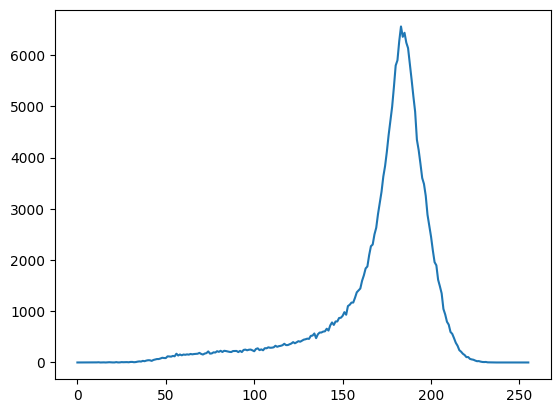

In [19]:
red_histogram_values=cv2.calcHist([show_bricks],[0],None,[256],[0,256]) # eğitimdeki başka yapmıştı ben bunu yapmak istedim
plt.plot(red_histogram_values) # ileride karıştırma grafiklerde bu komut

## cv2.calcHist() fonksiyonu, OpenCV kütüphanesinde bir görüntünün histogramını hesaplamak için kullanılır. Bu fonksiyon, görüntülerdeki renk yoğunluklarının dağılımını analiz etmek için oldukça yararlıdır. Fonksiyonun imzası ve parametreleri aşağıdaki gibidir: <br>
### cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) : <br>
* images: Kaynak görüntü(ler)in listesi. Görüntüler uint8 veya float32 tipinde olmalıdır. Örneğin, [img].

* channels: İncelenmek istenen kanalın indeksi. Gri seviye bir görüntü için [0] kullanılır. Eğer görüntü renkli ise, B, G, R kanalları sırasıyla 0, 1, 2 indeks numaralarına sahiptir. Örneğin, bir renkli görüntü için mavi kanalı incelemek isterseniz [0], kırmızı için [2] kullanabilirsiniz.

* mask: Maske görüntüsü. Eğer histogramı hesaplanacak görüntünün tamamı kullanılacaksa None verilir. Belirli bir bölge üzerinde histogram hesaplamak isterseniz, o bölge için maske oluşturmalısınız. Maske, işlem yapılmak istenmeyen pikseller için 0, işlem yapılmak istenen pikseller için 255 değerini alır.

* histSize: Her bir kanal için histogram kutu sayısı (bin). Örneğin, [256] tam bir aralık için kullanılır.

* ranges: Her bir kanal için histogramın hesaplanacağı aralık. Genellikle [0, 256] kullanılır. Bu, piksel değerlerinin 0'dan 255'e kadar olduğunu gösterir.

Opsiyonel parametreler:

* hist: Hesaplanan histogramın çıktısı. Genellikle bu parametre fonksiyon çağrısında belirtilmez çünkü fonksiyon zaten hesaplanan histogramı döndürür.

* accumulate: Bu flag, birden fazla görüntü üzerinde histogram hesaplanırken kullanılır. Eğer True olarak belirlenirse, yeni hesaplanan histogram öncekilerin üzerine eklenir. Böylece birden fazla görüntünün histogramı tek bir histogramda birleştirilebilir. Varsayılan değeri False'tur.


In [20]:
# eğitimdekini görelim
hist_values=cv2.calcHist([red_bricks],[0],None,[256],[0,256])
hist_values.shape

(256, 1)

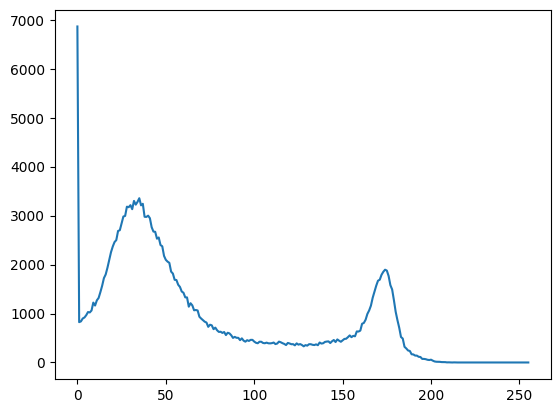

In [21]:
plt.plot(hist_values)

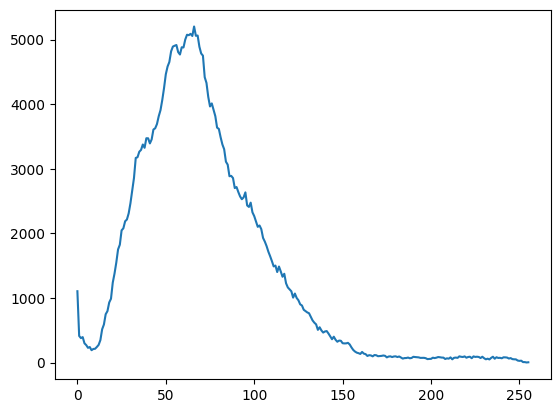

In [22]:
# at için
hist_values=cv2.calcHist([dark_horse],[0],None,[256],[0,256])
plt.plot(hist_values)

Text(0.5, 1.0, 'Histogram')

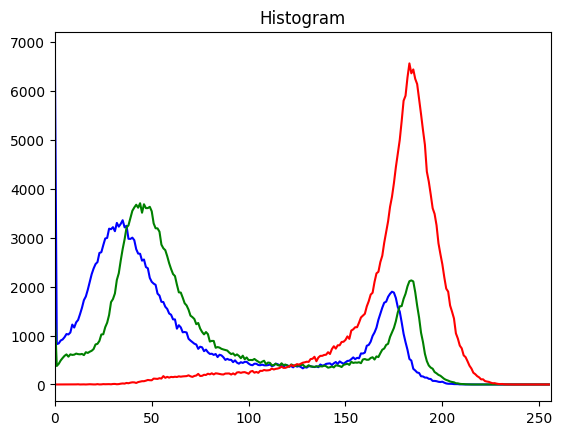

In [23]:
# şimdi b g r tamamı için görmek istiyorum
img=red_bricks
color=('b','g','r')
for i , col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.title('Histogram')

* for i , col in enumerate(color):
Bu for döngüsü, color tuple'ındaki her bir elemanı ve onların indekslerini (i) yineleyecek şekilde ayarlanmıştır. i indeksi, hangi BGR kanalının işlendiğini belirler (0: Mavi, 1: Yeşil, 2: Kırmızı), col ise o anki döngüdeki renk kanalını (‘b’, ‘g’, ‘r’) temsil eder.<br>
* plt.plot(histr,color=col)<br>
Bu satır, hesaplanan histogramı, color=col ile belirtilen renk kanalına göre çizer. col, o anki döngüdeki renk ('b', 'g', 'r').